# Introduction

Notebook to test the implementation of mini-patching related functionality

In [1]:
import tensorflow as tf
import tenfem
import matplotlib.pyplot as plt

In [2]:
mesh = tenfem.mesh.examples.star(0.2)
element = tenfem.reference_elements.TriangleElement(1)

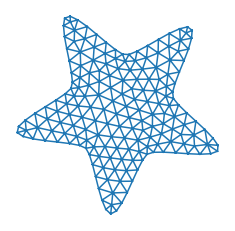

In [3]:
fig, ax = plt.subplots()
ax.triplot(mesh._triang)
ax.set_aspect('equal'); ax.axis('off')
plt.show()

In [4]:
submesh_provider = tenfem.layers.TaperedSubmeshProvider(mesh, element, 0.5)
submesh_provider._build_tapered_neighbors()
submesh_provider._build_mesh_neighborhood()

In [5]:
mesh_tensor_repr = submesh_provider(1.)
smesh = tenfem.mesh.utils.mesh_from_tensor_repr(mesh_tensor_repr, element)

ValueError: not enough values to unpack (expected 4, got 3)

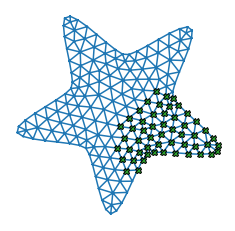

In [6]:
nodes, elems, node_t = mesh_tensor_repr

fig, ax = plt.subplots()
ax.triplot(mesh._triang)
ax.plot(*nodes.numpy().T, 'X', markeredgecolor='k')
ax.set_aspect('equal'); ax.axis('off')
plt.show()

In [7]:
# `boundary_elements` should be all those points on the boundary, w

In [8]:
len(submesh_provider.mesh_neighbours.to_list())

186

In [9]:
vertex = 5
self = submesh_provider

interior_nodes = tf.gather(self.tapered_neighbours, vertex)
boundary_nodes = tf.gather(self.mesh_neighbours, interior_nodes)
boundary_nodes = boundary_nodes.flat_values
boundary_nodes = tf.sets.difference(boundary_nodes[None, ...], interior_nodes[None, ...]).values


In [10]:
# 1. get all elements which have at least 1 (ideally 2?) boundary nodes

In [11]:
elems.numpy()

array([[23, 20, 18],
       [22, 18, 17],
       [48, 14, 46],
       [21, 15, 14],
       [21, 14, 48],
       [49, 47, 19],
       [ 6, 36, 37],
       [23, 18, 22],
       [51, 21, 48],
       [ 6, 33, 34],
       [25,  8,  7],
       [ 0, 17, 16],
       [ 0, 22, 17],
       [11, 27, 28],
       [ 1, 52, 50],
       [24, 22, 21],
       [24, 23, 22],
       [ 1, 50, 20],
       [ 1, 43, 52],
       [24, 21, 51],
       [10, 28, 29],
       [ 1, 23, 24],
       [25,  5,  4],
       [43, 24, 51],
       [25,  4, 16],
       [10, 11, 28],
       [36,  6, 35],
       [ 7, 31, 32],
       [ 2, 41, 42],
       [ 0, 15, 21],
       [ 9, 29, 30],
       [ 0, 21, 22],
       [ 1, 24, 43],
       [ 7,  8, 31],
       [ 6, 37, 38],
       [ 9, 10, 29],
       [25, 16,  8],
       [ 4, 39, 40],
       [14,  2, 44],
       [34, 35,  6],
       [12, 26, 27],
       [44,  2, 42],
       [ 3, 40, 41],
       [ 8, 30, 31],
       [20, 11, 10],
       [20, 19, 11],
       [20, 10, 18],
       [12, 2

In [12]:
node_t.numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
print(node_t.shape, elems.shape)

(53,) (77, 3)


In [14]:
square_mesh = tenfem.mesh.examples.square(6, 6)
square_mesh = tenfem.mesh.triangle.convert_linear_to_quadratic(square_mesh)
quad_tri = tenfem.reference_elements.TriangleElement(degree=2)

In [ ]:
square_mesh.elements

In [ ]:
square_mesh.nodes

In [ ]:
def quad_element_orientated_indexing(elem):
    """ Converts degree two element to an orientated indexing. """
    elem = tf.concat((elem[..., 0, tf.newaxis],
                      elem[..., 5, tf.newaxis],
                      elem[..., 1, tf.newaxis],
                      elem[..., 3, tf.newaxis],
                      elem[..., 2, tf.newaxis],
                      elem[..., 4, tf.newaxis]), axis=-1)
    return elem
    
#elems = quad_element_orientated_indexing(square_mesh.elements)
elems = quad_tri.orientate_element_indices(square_mesh)

In [ ]:
closed_elems = tf.concat((elems, elems[...,:1]), axis=-1)
edges = tf.concat((closed_elems[..., :-1, tf.newaxis], closed_elems[..., 1:, tf.newaxis]), axis=-1)

In [ ]:
# now just find edges everything is a boundary node
edges

In [ ]:
square_mesh.boundary_node_indices

In [ ]:
import numpy as np

In [ ]:
is_bnd = np.isin(edges.numpy(), square_mesh.boundary_node_indices.numpy())

In [ ]:
is_bnd_edge = np.logical_and(is_bnd[..., 0], is_bnd[..., 1])
bnd_edges = edges.numpy()[is_bnd_edge]

In [ ]:
bnd_edges

In [ ]:
from matplotlib.collections import LineCollection
fig, ax = plt.subplots()

ax.add_collection(
    LineCollection(tf.gather(square_mesh.nodes, bnd_edges), colors='k'))
ax.set_xlim((-0.05, 1.05))
ax.set_ylim((ax.get_xlim()))
ax.set_aspect('equal')
plt.show()
